In [3]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

APT_2016 = pd.read_csv('./dataset/APT2016.csv')
APT_2017 = pd.read_csv('./dataset/APT2017.csv')
APT_2018 = pd.read_csv('./dataset/APT2018.csv')
APT_2019 = pd.read_csv('./dataset/APT2019.csv')
APT_2020 = pd.read_csv('./dataset/APT2020.csv')
APT_2021 = pd.read_csv('./dataset/APT2021.csv')
APT_2022 = pd.read_csv('./dataset/APT2022.csv')

In [4]:
apt_concat2 = pd.concat([APT_2016,APT_2017,APT_2018,APT_2019,APT_2020,APT_2021,APT_2022],axis=0).copy()
apt_concat2.drop(labels='Unnamed: 0',axis=1, inplace=True)

apt_concat2['평당가격(만원)'] = apt_concat2['거래가격(만원)'] / apt_concat2['평수']
apt_concat2['평당가격(만원)'] = apt_concat2['평당가격(만원)'].round(1)


apt_concat = apt_concat2[['자치구명','동이름','건물명','건물용도','층정보','거래가격(만원)','평당가격(만원)','평수','건물면적(㎡)','년도']].copy()
apt_concat

,자치구명,동이름,건물명,건물용도,층정보,거래가격(만원),평당가격(만원),평수,건물면적(㎡),년도
0,영등포구,당산동1가,코오롱,아파트,10.0,1100,52.4,21.0,68.88,2016
1,서대문구,북아현동,북아현경남,아파트,1.0,3000,115.4,26.0,84.91,2016
2,동대문구,휘경동,휘경 SK VIEW,아파트,11.0,3242,124.7,26.0,84.31,2016
3,광진구,구의동,강변힐하우스,아파트,6.0,5000,1250.0,4.0,13.27,2016
4,광진구,구의동,강변힐하우스,아파트,3.0,5000,1250.0,4.0,13.27,2016
...,...,...,...,...,...,...,...,...,...,...
8950,용산구,한남동,르가든더메인한남,아파트,6.0,900000,13235.3,68.0,225.41,2022
8951,용산구,한남동,르가든더메인한남,아파트,2.0,900000,11111.1,81.0,269.12,2022
8952,용산구,한남동,한남더힐,아파트,3.0,1100000,15068.5,73.0,240.31,2022
8953,용산구,한남동,파르크한남,아파트,5.0,1350000,16666.7,81.0,268.67,2022


In [5]:
apt_price = apt_concat.drop(['자치구명','동이름','건물명','건물용도','층정보','건물면적(㎡)'], axis = 1).copy()
apt_price

,거래가격(만원),평당가격(만원),평수,년도
0,1100,52.4,21.0,2016
1,3000,115.4,26.0,2016
2,3242,124.7,26.0,2016
3,5000,1250.0,4.0,2016
4,5000,1250.0,4.0,2016
...,...,...,...,...
8950,900000,13235.3,68.0,2022
8951,900000,11111.1,81.0,2022
8952,1100000,15068.5,73.0,2022
8953,1350000,16666.7,81.0,2022


In [6]:
apt_price_grouped = apt_price.groupby(['년도'])

# apt_price_mean.size() # 해당 그룹의 값이 몇개가 있는지 확인


In [7]:
apt_price_mean2 = apt_price_grouped.mean().round(1)
apt_price_max = apt_price_grouped.max().round(1)
apt_price_min = apt_price_grouped.min().round(1)
apt_price_mean2

,거래가격(만원),평당가격(만원),평수
년도,,,
2016,54738.4,2275.4,24.0
2017,61450.9,2547.5,24.1
2018,67094.2,2754.6,24.3
2019,82179.0,3458.1,23.6
2020,83935.9,3626.9,23.2
2021,102590.3,4541.1,22.3
2022,103558.0,4717.0,20.7


In [8]:
apt_price_max

,거래가격(만원),평당가격(만원),평수
년도,,,
2016,790000,10675.7,128.0
2017,820000,13684.2,83.0
2018,810000,16153.8,120.0
2019,840000,21818.2,83.0
2020,950000,22727.3,96.0
2021,1200000,18281.0,96.0
2022,1450000,18250.0,91.0


In [9]:
apt_price_1 = apt_price_mean2.iloc[:,0]
apt_price_2 = apt_price_mean2.iloc[:,1]
apt_price_max = apt_price_max.iloc[:,0]
apt_price_min= apt_price_min.iloc[:,0]

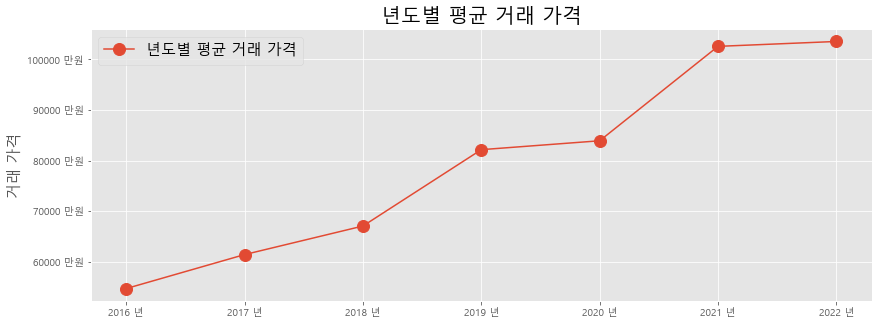

In [10]:
#'년도별 평균 거래 가격(만원)'
plt.style.use('ggplot') #그래프 디자인 스타일.


plt.figure(figsize = (14,5))
plt.xticks(size = 10)
plt.plot(apt_price_1.index, apt_price_1.values, marker='o', markersize=12)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i 년')) 
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만원' )) 
plt.title('년도별 평균 거래 가격', size=20)
# plt.xlabel('년도',size=20)
plt.ylabel('거래 가격',size=15)
plt.legend(labels=['년도별 평균 거래 가격'], loc='best', fontsize=15)
plt.show()

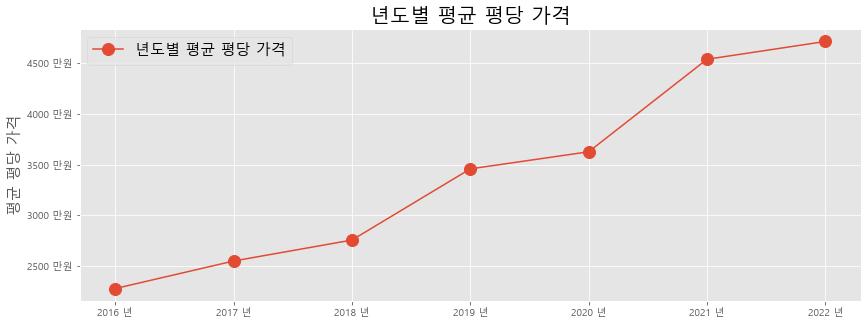

In [11]:
# '년도별 평균 평당 가격(만원)



# plt.style.use('ggplot')
plt.figure(figsize = (14,5))
plt.xticks(size = 10)
plt.plot(apt_price_2.index, apt_price_2.values, marker='o', markersize=12)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i 년')) 
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만원' )) 
plt.title('년도별 평균 평당 가격', size=20)
# plt.xlabel('년도',size=20)
plt.ylabel('평균 평당 가격',size=15)
plt.legend(labels=['년도별 평균 평당 가격'], loc='best', fontsize=15)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


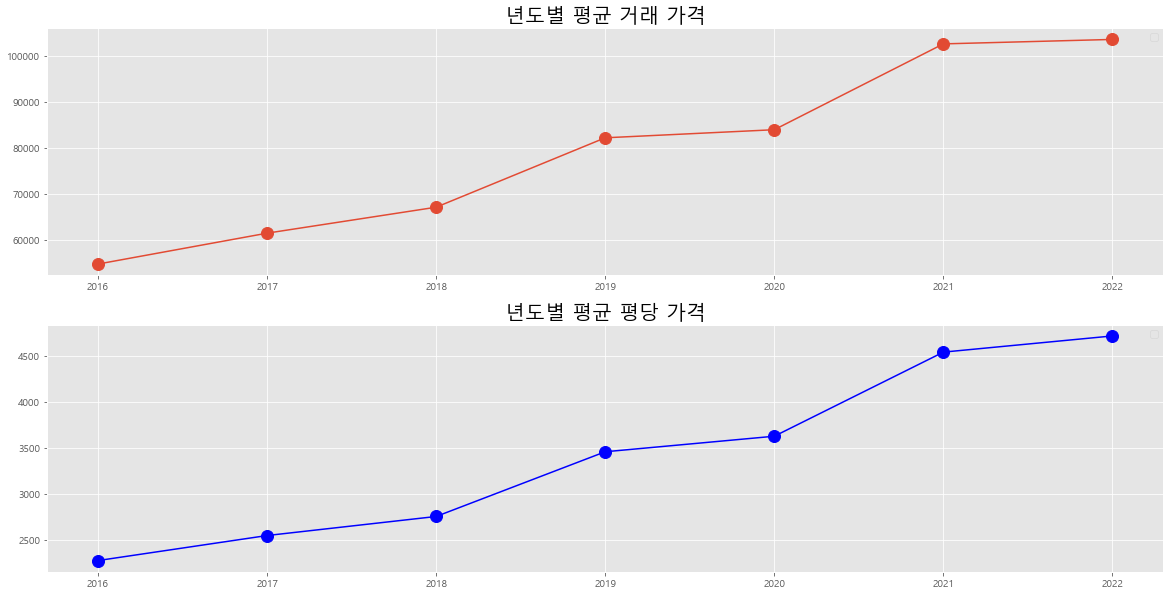

In [12]:
## 년도별 평균(거래,평) 그래프

# plt.style.use('ggplot')
fig = plt.figure(figsize = (20,10))

apt_mean_1 = fig.add_subplot(2, 1, 1)
apt_mean_2 = fig.add_subplot(2, 1, 2)

apt_mean_1.set_title('년도별 평균 거래 가격',size=20)
apt_mean_2.set_title('년도별 평균 평당 가격',size=20)

apt_mean_1.plot(apt_price_1, marker='o', markersize=12)
apt_mean_2.plot(apt_price_2, color = 'blue', marker='o', markersize=12)


apt_mean_1.legend(loc='best')
apt_mean_2.legend(loc='best')


plt.show()

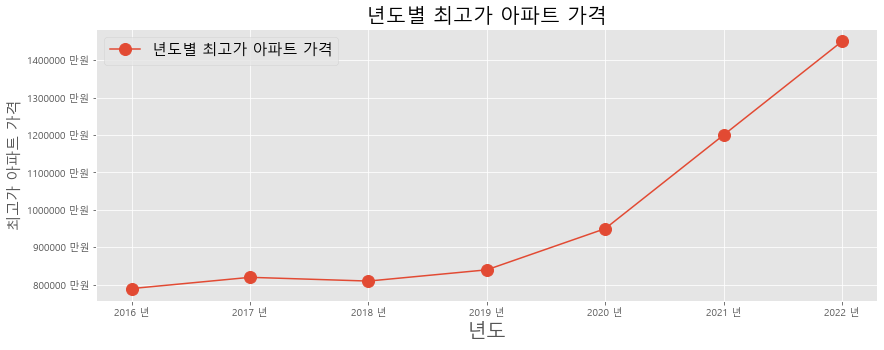

In [13]:
# plt.style.use('ggplot')
plt.figure(figsize = (14,5))
plt.xticks(size = 10)
plt.plot(apt_price_max.index, apt_price_max.values, marker='o', markersize=12)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i 년')) 
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만원' )) 
plt.title('년도별 최고가 아파트 가격', size=20)
plt.xlabel('년도',size=20)
plt.ylabel('최고가 아파트 가격',size=15)
plt.legend(labels=['년도별 최고가 아파트 가격'], loc='best', fontsize=15)
# plt.show()

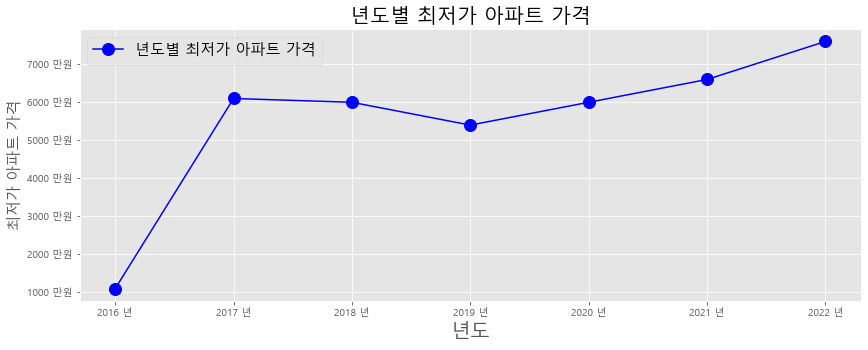

In [14]:
# plt.style.use('ggplot') #스타일 정함
plt.figure(figsize = (14,5))
plt.xticks(size = 10)
#그래프에 X축 Y축 설정후 컬러와 마커,크기 설정
plt.plot(apt_price_min.index, apt_price_min.values, color = 'blue', marker='o', markersize=12) 

plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i 년')) 
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만원' )) 
plt.title('년도별 최저가 아파트 가격', size=20)
plt.xlabel('년도',size=20)
plt.ylabel('최저가 아파트 가격',size=15)
plt.legend(labels=['년도별 최저가 아파트 가격'], loc='best', fontsize=15)
# plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7500\1833818026.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in cur_values])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


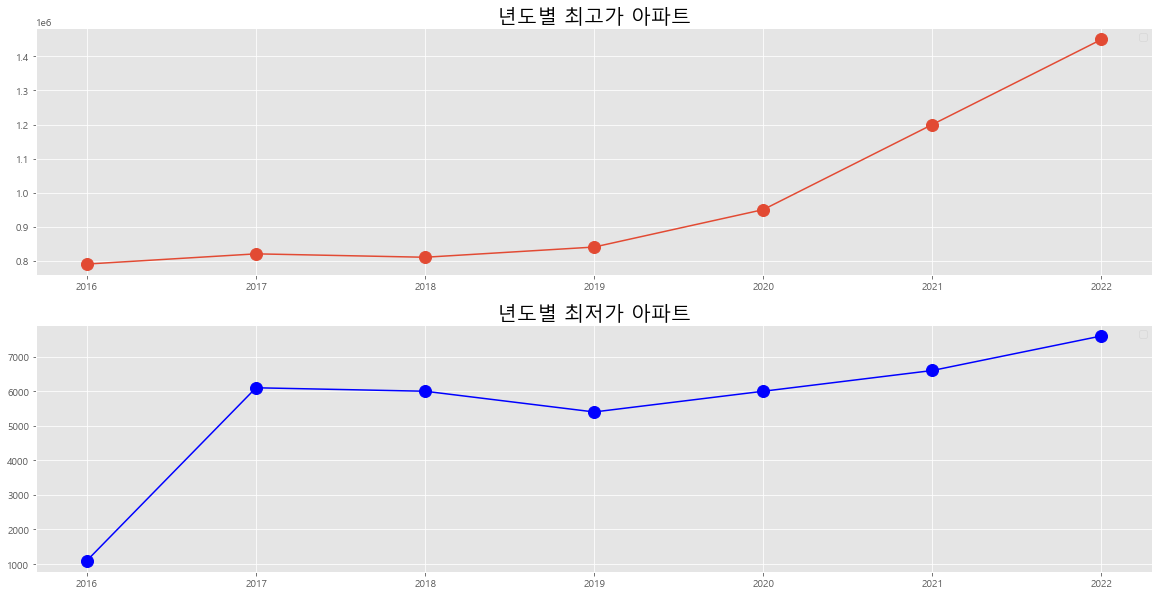

In [21]:
## 년도별 최고가 최저가 그래프

# plt.style.use('ggplot')
fig = plt.figure(figsize = (20,10))

apt_max = fig.add_subplot(2, 1, 1)
apt_min = fig.add_subplot(2, 1, 2)

apt_max.set_title('년도별 최고가 아파트',size=20)
apt_min.set_title('년도별 최저가 아파트',size=20)

apt_max.plot(apt_price_max, marker='o', markersize=12)
apt_min.plot(apt_price_min, color = 'blue', marker='o', markersize=12)

cur_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in cur_values])

apt_max.legend(loc='best')
apt_min.legend(loc='best')


plt.show()

In [25]:
apt_gudong = apt_concat.drop(['건물용도','층정보','평당가격(만원)','평수','건물면적(㎡)'], axis = 1)
apt_gudong_max = apt_gudong.groupby(['자치구명']).max(['거래가격(만원)'])
apt_gudong_min = apt_gudong.groupby(['자치구명']).min(['거래가격(만원)'])

apt_gudong = apt_gudong.astype({'년도':'str'})

apt_gudong_min

,거래가격(만원),년도
자치구명,,
강남구,14446,2016
강동구,7200,2016
강북구,7500,2016
강서구,6100,2016
관악구,9000,2016
광진구,5000,2016
구로구,5400,2016
금천구,6500,2016
노원구,6750,2016


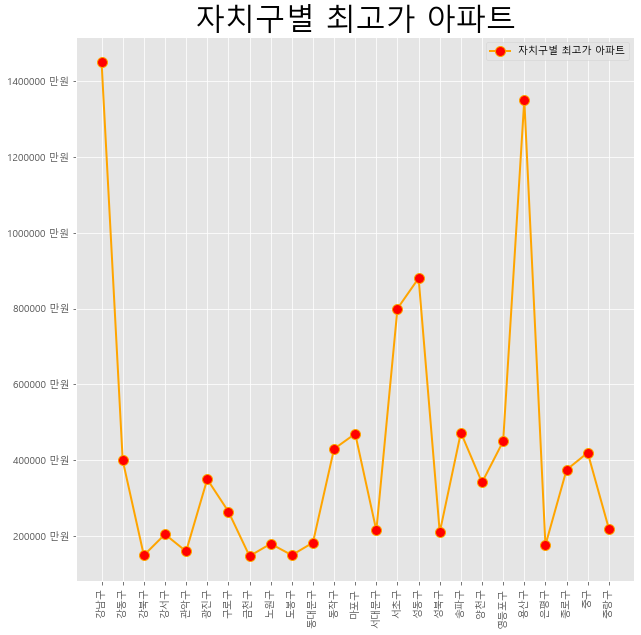

In [28]:
apt_gudong_max_test = apt_gudong_max.drop(['년도'], axis=1).copy()
# apt_gudong_max_test

# plt.style.use('ggplot')
fig = plt.figure(figsize = (10,10))
ax2 = fig.add_subplot(1, 1, 1)
plt.title('자치구별 최고가 아파트',size=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만원' )) 
ax2.plot(apt_gudong_max_test, marker='o', markerfacecolor='red', markersize=10,
        color='orange', linewidth=2, label='자치구별 최고가 아파트')
ax2.legend(loc='best')
plt.xticks(rotation = 'vertical')

plt.show()

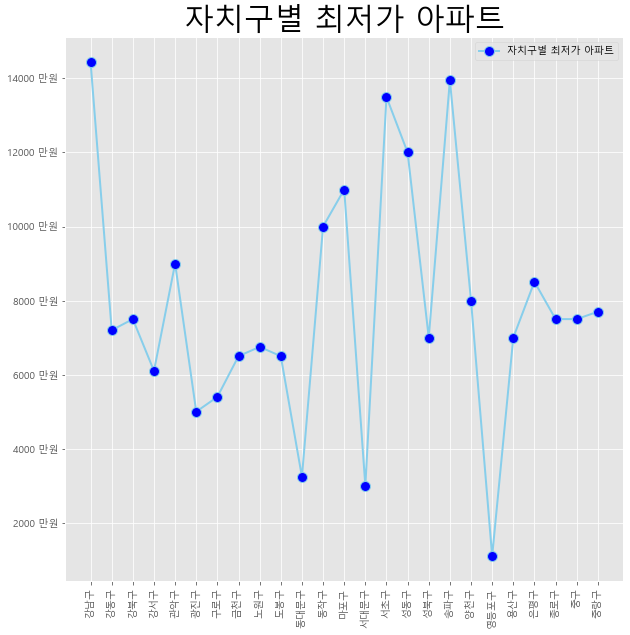

In [29]:
apt_gudong_min_test = apt_gudong_min.drop(['년도'], axis=1).copy()
# apt_gudong_min_test

# plt.style.use('ggplot')
fig = plt.figure(figsize = (10,10))
ax2 = fig.add_subplot(1, 1, 1)
plt.title('자치구별 최저가 아파트',size=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만원' ))
ax2.plot(apt_gudong_min_test, marker='o', markerfacecolor='blue', markersize=10,
        color='skyblue', linewidth=2, label='자치구별 최저가 아파트')
ax2.legend(loc='best')
plt.xticks(rotation = 'vertical')

plt.show()

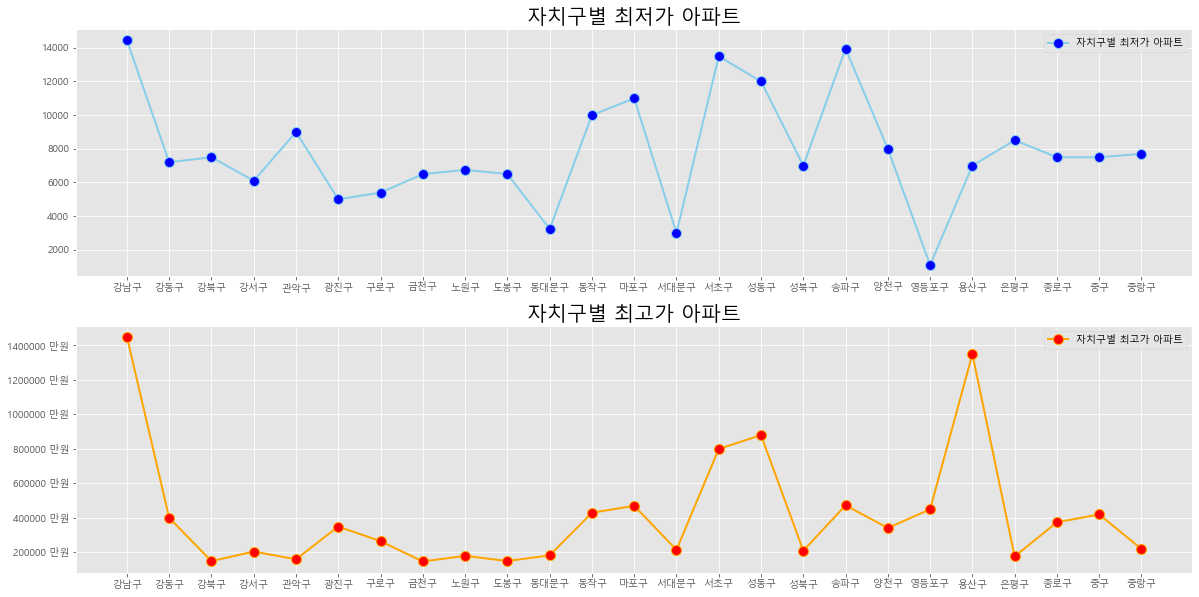

In [30]:
## 자치구별 최고가 최저가 그래프



# plt.style.use('ggplot')
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax2.set_title('자치구별 최고가 아파트',size=20)
ax1.set_title('자치구별 최저가 아파트',size=20)

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만원' )) 


ax2.plot(apt_gudong_max_test, marker='o', markerfacecolor='red', markersize=10,
        color='orange', linewidth=2, label='자치구별 최고가 아파트')
ax1.plot(apt_gudong_min_test, marker='o', markerfacecolor='blue', markersize=10,
        color='skyblue', linewidth=2, label='자치구별 최저가 아파트')

ax2.legend(loc='best')
ax1.legend(loc='best')

# ax2.set.xtickslabels(rotation = 'vertical')

plt.show()

In [31]:
apt_gu = apt_concat.groupby(['자치구명']).mean().round(0).copy()
apt_gu = apt_gu.iloc[:,2].copy()
# print(apt_gu)

In [35]:
mean_2022 = APT_2022.copy()
mean_2022.loc[:, ['평수']] = mean_2022.loc[:, ['평수']].astype('int64')

mean_2022['평당가격(만원)'] = mean_2022['거래가격(만원)'] / mean_2022['평수']
mean_2022['평당가격(만원)'] = mean_2022['평당가격(만원)'] .round(0)
mean_2022
# mean_2022
# 

,자치구명,동이름,건물명,건물용도,층정보,거래가격(만원),평수,건물면적(㎡),년도,평당가격(만원)
0,구로구,오류동,썬앤빌,아파트,15.0,7600,4,14.06,2022,1900.0
1,강서구,화곡동,한양아이클래스,아파트,8.0,7950,4,13.79,2022,1988.0
2,구로구,오류동,썬앤빌,아파트,9.0,8000,4,14.06,2022,2000.0
3,광진구,화양동,(20-3),아파트,4.0,8000,4,12.42,2022,2000.0
4,강동구,길동,현대웰하임(201동),아파트,4.0,8000,4,14.47,2022,2000.0
...,...,...,...,...,...,...,...,...,...,...
8950,용산구,한남동,르가든더메인한남,아파트,6.0,900000,68,225.41,2022,13235.0
8951,용산구,한남동,르가든더메인한남,아파트,2.0,900000,81,269.12,2022,11111.0
8952,용산구,한남동,한남더힐,아파트,3.0,1100000,73,240.31,2022,15068.0
8953,용산구,한남동,파르크한남,아파트,5.0,1350000,81,268.67,2022,16667.0


In [36]:
test_2022 =mean_2022.drop(['동이름','건물명','건물용도','층정보','거래가격(만원)','평수','건물면적(㎡)','년도'], axis=1).copy()
test_2022
# drop(labels='Unnamed: 0',axis=1, inplace=True)

,자치구명,평당가격(만원)
0,구로구,1900.0
1,강서구,1988.0
2,구로구,2000.0
3,광진구,2000.0
4,강동구,2000.0
...,...,...
8950,용산구,13235.0
8951,용산구,11111.0
8952,용산구,15068.0
8953,용산구,16667.0


In [39]:
test_2022 = test_2022.groupby(['자치구명'])
test_2022 = test_2022.mean().round(1)
test_2022

,평당가격(만원)
자치구명,
강남구,7968.4
강동구,4450.1
강북구,3003.6
강서구,3528.5
관악구,3539.2
광진구,4954.1
구로구,2975.9
금천구,3063.3
노원구,3878.2


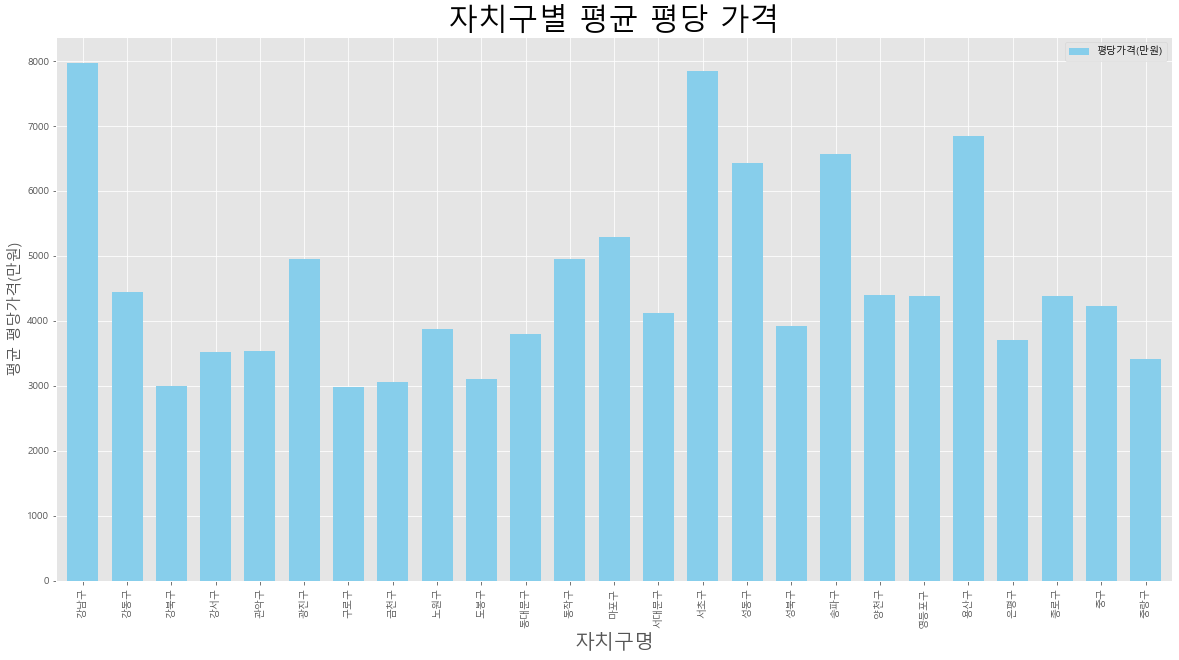

In [40]:
# plt.style.use('ggplot')

test_2022.plot(kind='bar', figsize=(20,10), width=0.7,
              color='skyblue')
plt.title('자치구별 평균 평당 가격',size=30)
plt.ylabel('평균 평당가격(만원)',size=15)
plt.xlabel('자치구명',size=20)
plt.xticks(rotation = 'vertical')

plt.show()